In [176]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns

from matplotlib import pyplot as plt
from hdbscan import HDBSCAN 

In [177]:
### Faster
time_resolution = 30
time_window = 5

In [178]:
df_tech_overlaps = pd.read_csv("../result_csv/tech_overlaps_smoothed"+str(time_resolution+time_window)+".csv")
df_tech_overlaps = pd.read_csv("../result_csv/tech_overlaps_smoothed"+str(time_resolution+time_window)+".csv")
df_tech_edgesize = pd.read_csv("../result_csv/tech_edgesize_smoothed"+str(time_resolution+time_window)+".csv")
df_tech_edgesize = pd.read_csv("../result_csv/tech_edgesize_smoothed"+str(time_resolution+time_window)+".csv")

all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

all_graduated = [x.lower() for x in all_graduated if x.lower() in df_tech_overlaps.columns and x.lower() in df_tech_overlaps.columns]
all_retired = [x.lower() for x in all_retired if x.lower() in df_tech_overlaps.columns and x.lower() in df_tech_overlaps.columns]

In [179]:
sustain_label_tech = []
for proj in df_tech_edgesize.columns :
    if proj.lower() in all_graduated:
        sustain_label_tech.append(100)
        continue
    elif proj.lower() in all_retired:
        sustain_label_tech.append(0)
        continue
    else:
        sustain_label_tech.append(-1)

sustain_label_tech = []
for proj in df_tech_edgesize.columns :
    if proj.lower() in all_graduated:
        sustain_label_tech.append(100)
        continue
    elif proj.lower() in all_retired:
        sustain_label_tech.append(0)
        continue
    else:
        sustain_label_tech.append(-1)


In [180]:
pd.Series(sustain_label_tech).value_counts()

 100    189
 0       50
-1       19
dtype: int64

In [181]:
pd.Series(sustain_label_tech).value_counts()

 100    189
 0       50
-1       19
dtype: int64

In [182]:
t = pd.DataFrame(sustain_label_tech).T
t.columns = df_tech_edgesize.columns
t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True)

/tmp/ipykernel_31773/2266264582.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True)


,openwebbeans,jena,shindig,sanselan,skywalking,stdcxx,wave,tajo,ratis,mrunit,...,juice,muse,chemistry,beehive,reef,cayenne,ofbiz,zipkin,subversion,cmda
0,100,100,100,100,100,100,0,100,100,100,...,0,100,100,100,100,100,100,0,100,-1
1,145,18,133,7,1019,9,28,674,667,30,...,9,10,133,632,1131,375,754,1,505,459
2,393,5,227,206,430,55,16,284,254,5,...,-1,159,94,305,121,144,228,40,345,808
3,199,17,308,101,1277,47,2,566,80,1,...,-1,26,135,880,2011,612,1135,41,-1,-1
4,129,208,243,26,1191,80,2,316,76,5,...,-1,634,51,419,698,470,213,32,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
96,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
97,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
98,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [183]:
df_tech_edgesize_groups = t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True).T

/tmp/ipykernel_31773/848246505.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tech_edgesize_groups = t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True).T


In [184]:
df_tech_edgesize_groups

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
openwebbeans,100,145,393,199,129,183,188,247,200,259,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
jena,100,18,5,17,208,258,288,306,975,648,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
shindig,100,133,227,308,243,559,666,811,675,377,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
sanselan,100,7,206,101,26,12,9,1,17,91,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
skywalking,100,1019,430,1277,1191,456,933,465,2218,470,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cayenne,100,375,144,612,470,390,111,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ofbiz,100,754,228,1135,213,342,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
zipkin,0,1,40,41,32,27,1340,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
subversion,100,505,345,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [185]:
df_tech_edgesize_graduated = df_tech_edgesize_groups.where(df_tech_edgesize_groups[0]==100).dropna()[range(1,99)]

In [186]:
df_tech_edgesize_graduated

,1,2,3,4,5,6,7,8,9,10,...,89,90,91,92,93,94,95,96,97,98
openwebbeans,145.0,393.0,199.0,129.0,183.0,188.0,247.0,200.0,259.0,270.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
jena,18.0,5.0,17.0,208.0,258.0,288.0,306.0,975.0,648.0,296.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
shindig,133.0,227.0,308.0,243.0,559.0,666.0,811.0,675.0,377.0,348.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
sanselan,7.0,206.0,101.0,26.0,12.0,9.0,1.0,17.0,91.0,15.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
skywalking,1019.0,430.0,1277.0,1191.0,456.0,933.0,465.0,2218.0,470.0,940.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
beehive,632.0,305.0,880.0,419.0,214.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
reef,1131.0,121.0,2011.0,698.0,267.0,386.0,1499.0,1198.0,494.0,439.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
cayenne,375.0,144.0,612.0,470.0,390.0,111.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
ofbiz,754.0,228.0,1135.0,213.0,342.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [187]:
df_tech_edgesize_retired = df_tech_edgesize_groups.where(df_tech_edgesize_groups[0]==0).dropna()[range(1,99)]

In [188]:
df_tech_edgesize_retired.head()

,1,2,3,4,5,6,7,8,9,10,...,89,90,91,92,93,94,95,96,97,98
wave,28.0,16.0,2.0,2.0,1.0,17.0,7.0,24.0,26.0,31.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
awf,105.0,24.0,10.0,109.0,107.0,6.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
tamaya,734.0,380.0,285.0,144.0,245.0,81.0,94.0,152.0,232.0,179.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
tashi,44.0,2.0,19.0,35.0,11.0,19.0,29.0,23.0,20.0,6.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
myriad,573.0,223.0,7.0,18.0,12.0,3.0,31.0,25.0,65.0,104.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [189]:
t = pd.DataFrame(sustain_label_tech).T
t.columns = df_tech_edgesize.columns
t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True)

/tmp/ipykernel_31773/2266264582.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True)


,openwebbeans,jena,shindig,sanselan,skywalking,stdcxx,wave,tajo,ratis,mrunit,...,juice,muse,chemistry,beehive,reef,cayenne,ofbiz,zipkin,subversion,cmda
0,100,100,100,100,100,100,0,100,100,100,...,0,100,100,100,100,100,100,0,100,-1
1,145,18,133,7,1019,9,28,674,667,30,...,9,10,133,632,1131,375,754,1,505,459
2,393,5,227,206,430,55,16,284,254,5,...,-1,159,94,305,121,144,228,40,345,808
3,199,17,308,101,1277,47,2,566,80,1,...,-1,26,135,880,2011,612,1135,41,-1,-1
4,129,208,243,26,1191,80,2,316,76,5,...,-1,634,51,419,698,470,213,32,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
96,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
97,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
98,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [190]:
df_tech_edgesize_groups = t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True).T

/tmp/ipykernel_31773/848246505.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tech_edgesize_groups = t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True).T


In [191]:
df_tech_edgesize_graduated = df_tech_edgesize_groups.where(df_tech_edgesize_groups[0]==100).dropna()[range(1,99)]
df_tech_edgesize_graduated

,1,2,3,4,5,6,7,8,9,10,...,89,90,91,92,93,94,95,96,97,98
openwebbeans,145.0,393.0,199.0,129.0,183.0,188.0,247.0,200.0,259.0,270.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
jena,18.0,5.0,17.0,208.0,258.0,288.0,306.0,975.0,648.0,296.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
shindig,133.0,227.0,308.0,243.0,559.0,666.0,811.0,675.0,377.0,348.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
sanselan,7.0,206.0,101.0,26.0,12.0,9.0,1.0,17.0,91.0,15.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
skywalking,1019.0,430.0,1277.0,1191.0,456.0,933.0,465.0,2218.0,470.0,940.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
beehive,632.0,305.0,880.0,419.0,214.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
reef,1131.0,121.0,2011.0,698.0,267.0,386.0,1499.0,1198.0,494.0,439.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
cayenne,375.0,144.0,612.0,470.0,390.0,111.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
ofbiz,754.0,228.0,1135.0,213.0,342.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [192]:
df_tech_edgesize_retired = df_tech_edgesize_groups.where(df_tech_edgesize_groups[0]==0).dropna()[range(1,99)]
df_tech_edgesize_retired.shape

(50, 98)

In [193]:
vectors_tech_edgesize_graduated = df_tech_edgesize_graduated[range(1,24)].replace(-1.0,0.0).values
vectors_tech_edgesize_retired = df_tech_edgesize_retired[range(1,24)].replace(-1.0,0.0).values
vectors_tech_edgesize_retired = df_tech_edgesize_retired[range(1,24)].replace(-1.0,0.0).values
vectors_tech_edgesize_graduated = df_tech_edgesize_graduated[range(1,24)].replace(-1.0,0.0).values

# Clustering of Graduate Group

<AxesSubplot:>

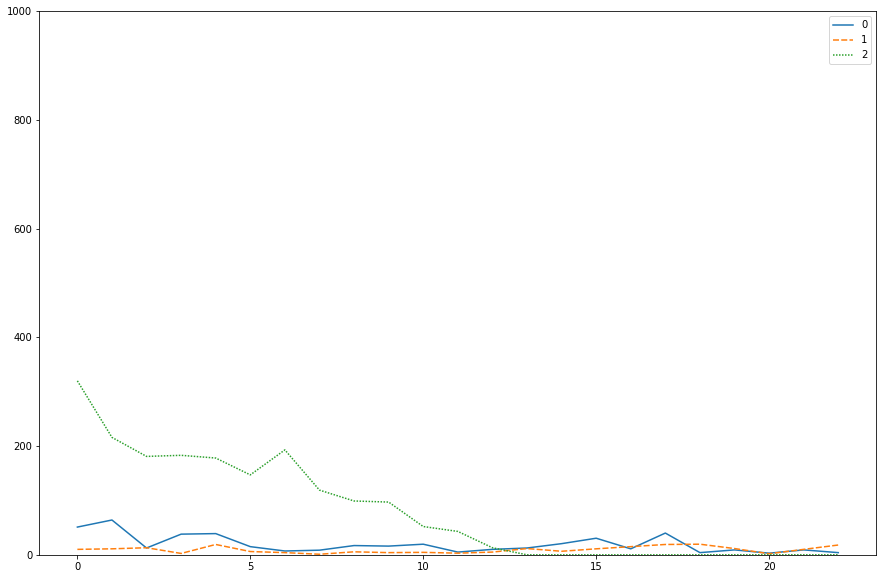

In [194]:
tech_graduated_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_tech_edgesize_graduated)
df_labels_mean = pd.DataFrame(np.c_[vectors_tech_edgesize_graduated, tech_graduated_clusterer.labels_]).groupby(23).agg('median')
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_labels_mean.values.T)

In [195]:
pd.value_counts(tech_graduated_clusterer.labels_)

 1    175
-1     10
 0      4
dtype: int64

<AxesSubplot:>

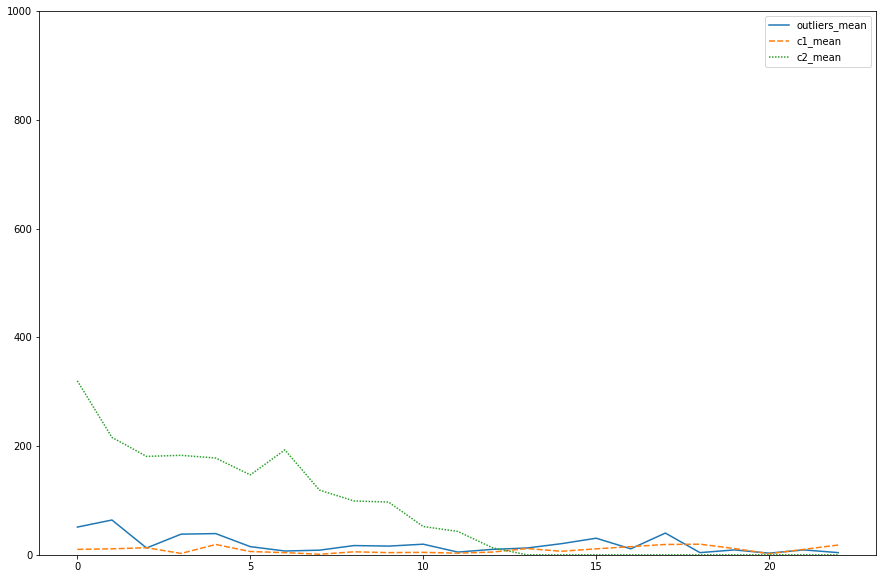

In [196]:
temp_labels_mean = df_labels_mean.T
temp_labels_mean.columns=['outliers_mean', 'c1_mean', 'c2_mean']
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= temp_labels_mean)

In [197]:
temp_labels_mean.loc[23]=[-1,0,1]

In [198]:
df_tech_edgesize_graduated_labeled = pd.DataFrame(np.c_[vectors_tech_edgesize_graduated, tech_graduated_clusterer.labels_]).T
df_tech_edgesize_graduated_labeled.columns = df_tech_edgesize_graduated.T.columns
df_tech_edgesize_graduated_labeled = pd.concat([df_tech_edgesize_graduated_labeled.T, temp_labels_mean.T], axis=0)
#df_tech_edgesize_graduated_labeled['time'] = df_tech_edgesize_graduated_labeled.index
#df_tech_edgesize_graduated_labeled

### Cluster 1

<AxesSubplot:>

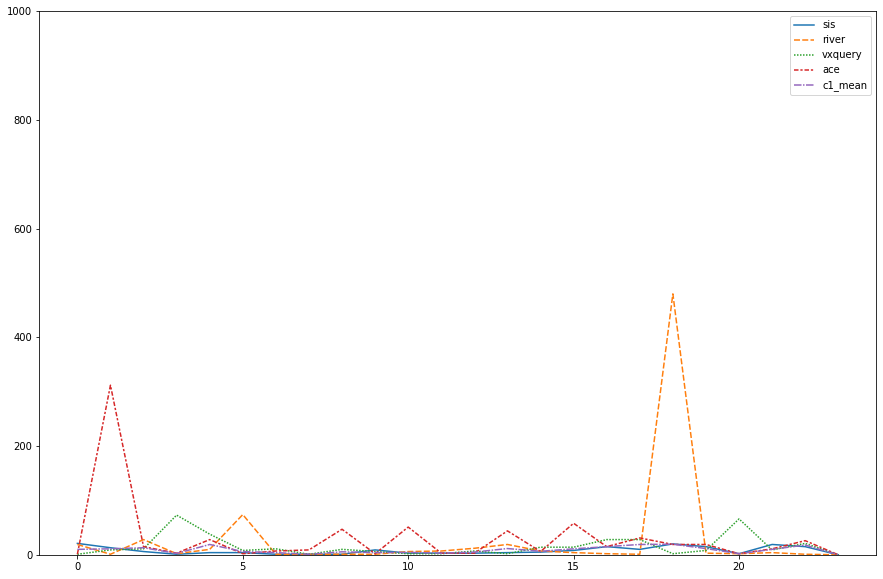

In [199]:
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_tech_edgesize_graduated_labeled.groupby(23).get_group(0.0).T)

### Subcluster of cluster 1

In [200]:
this_group= df_tech_edgesize_graduated_labeled.groupby(23).get_group(0.0)
len(this_group)

5

<AxesSubplot:>

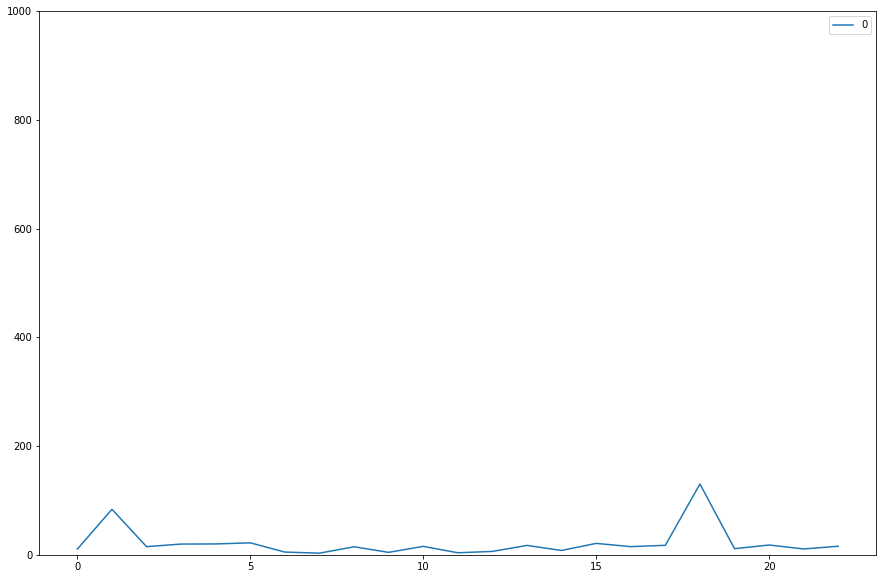

In [201]:
vectors_temp = this_group.drop(['c1_mean'])[range(23)].values
temp_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_temp)
df_labels_temp = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_labels_temp.values.T)

+ XLarge > 200
+ Large > 100
+ Small < 50

In [202]:
pd.value_counts(temp_clusterer.labels_)

-1    4
dtype: int64

In [203]:
df_temp_clusters = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).T
df_temp_clusters.columns = this_group.T.columns[:len(this_group.T.columns)-1]
df_temp_clusters = df_temp_clusters.T

<AxesSubplot:>

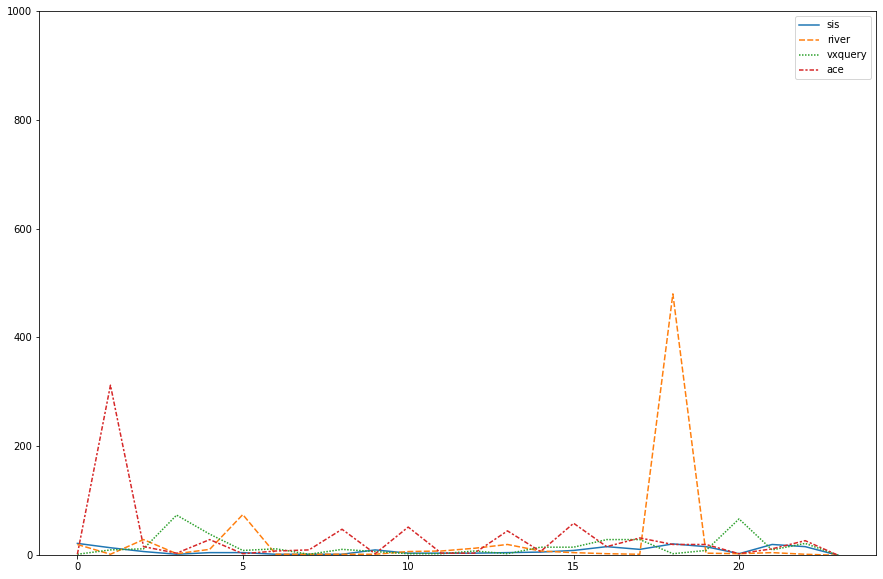

In [204]:
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(-1.0).T)

### Cluster 1

<AxesSubplot:>

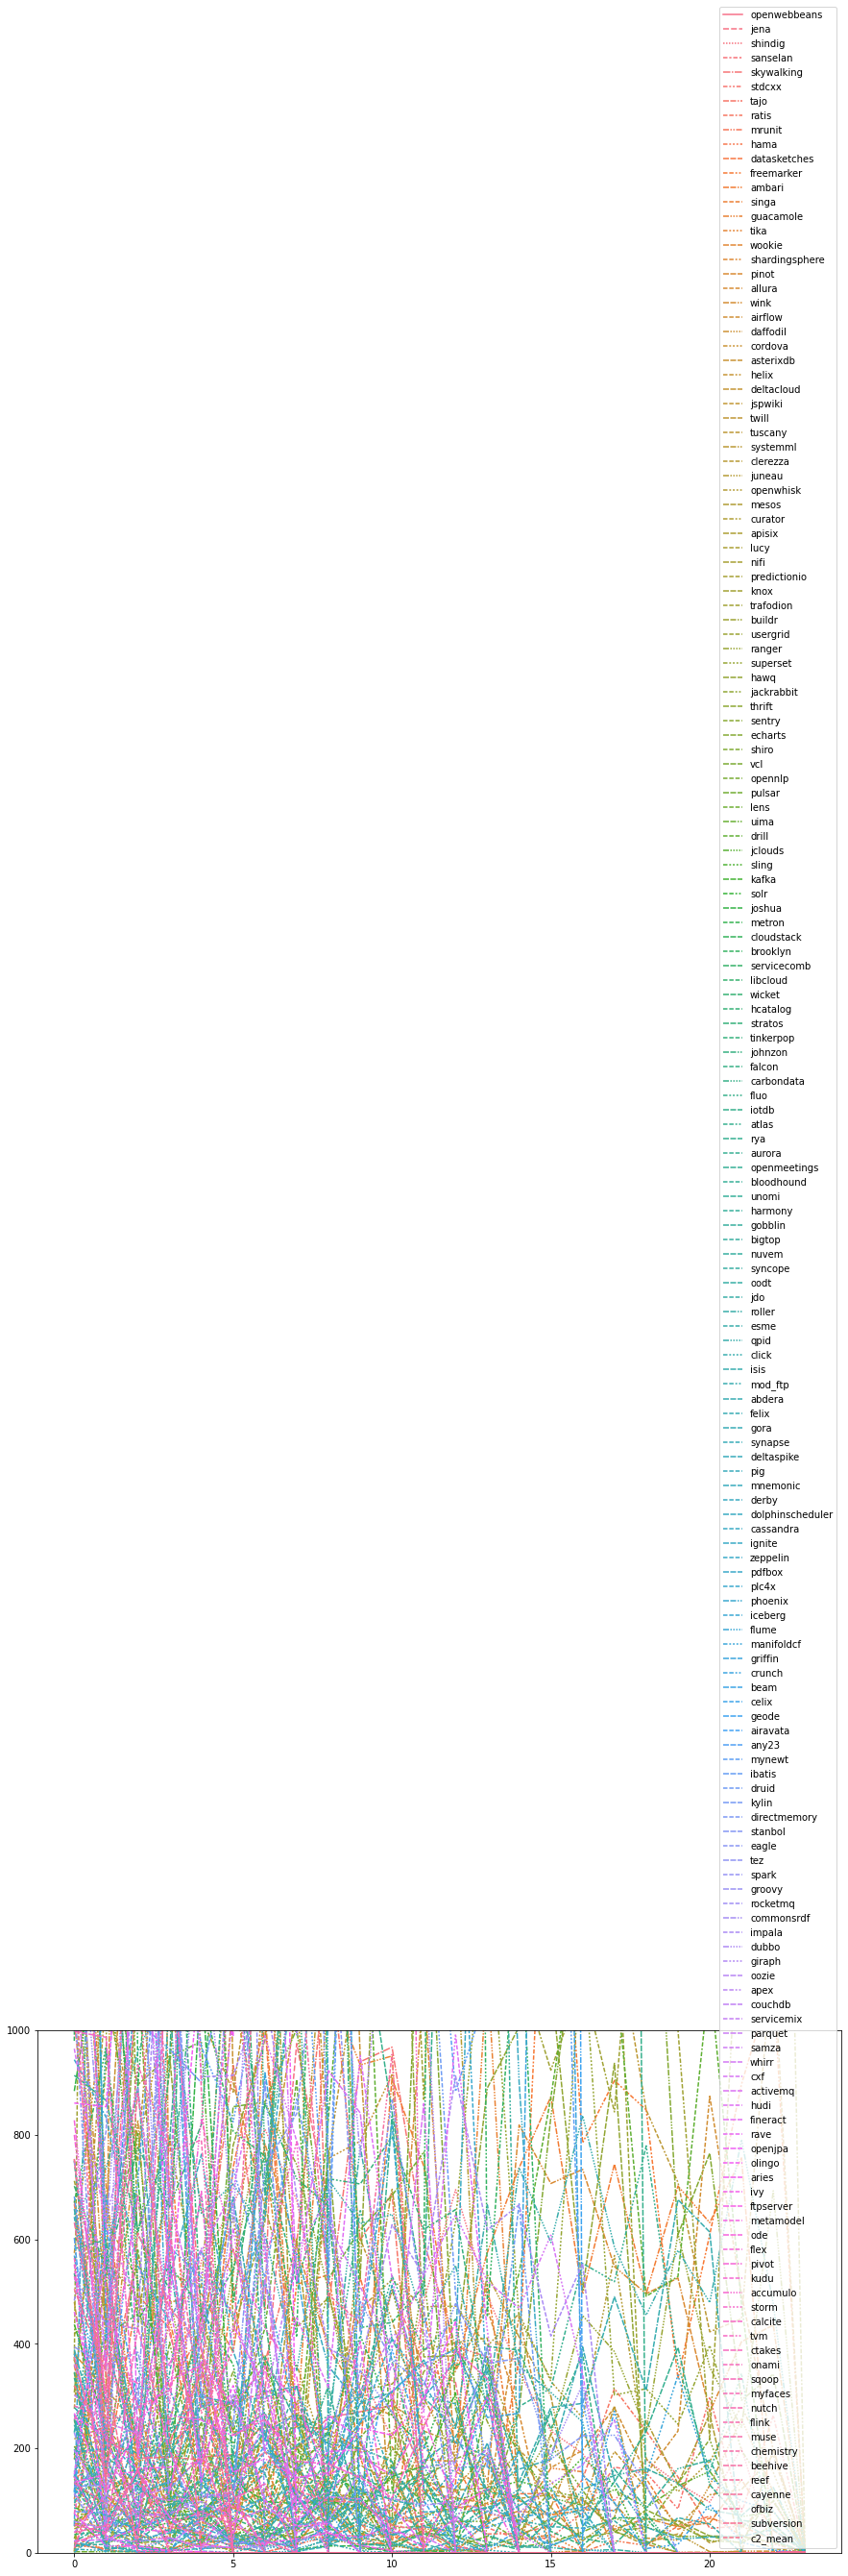

In [205]:
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_tech_edgesize_graduated_labeled.groupby(23).get_group(1.0).T)

# Subclusters of Cluster 1

In [206]:
this_group= df_tech_edgesize_graduated_labeled.groupby(23).get_group(1.0)
len(this_group)

176

<AxesSubplot:>

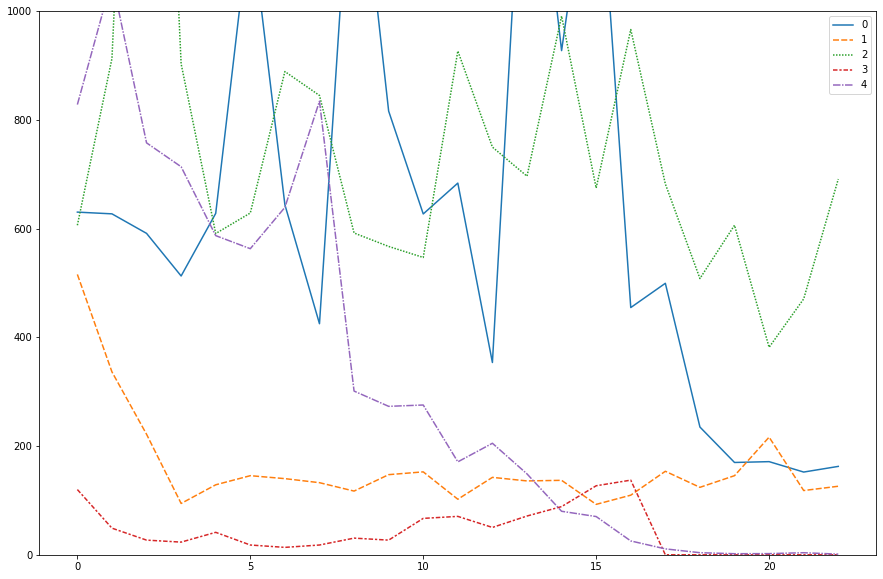

In [207]:
vectors_temp = this_group.drop(['c2_mean'])[range(23)].values
temp_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_temp)
df_labels_temp = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_labels_temp.values.T)

In [208]:
pd.value_counts(temp_clusterer.labels_)

 3    126
-1     33
 0      9
 1      4
 2      3
dtype: int64

In [209]:
df_temp_clusters = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).T
df_temp_clusters.columns = this_group.T.columns[:len(this_group.T.columns)-1]
df_temp_clusters = df_temp_clusters.T

<AxesSubplot:>

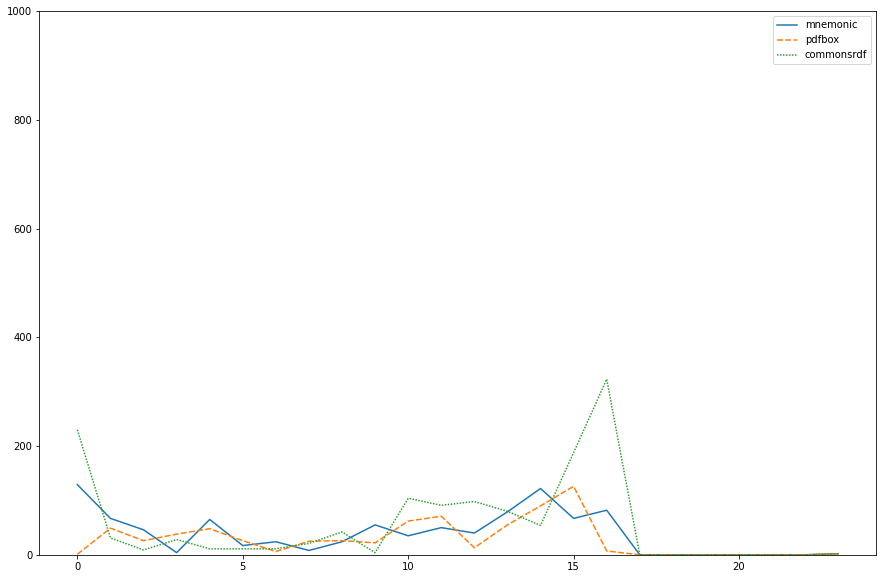

In [210]:
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(2.0).T)

<AxesSubplot:>

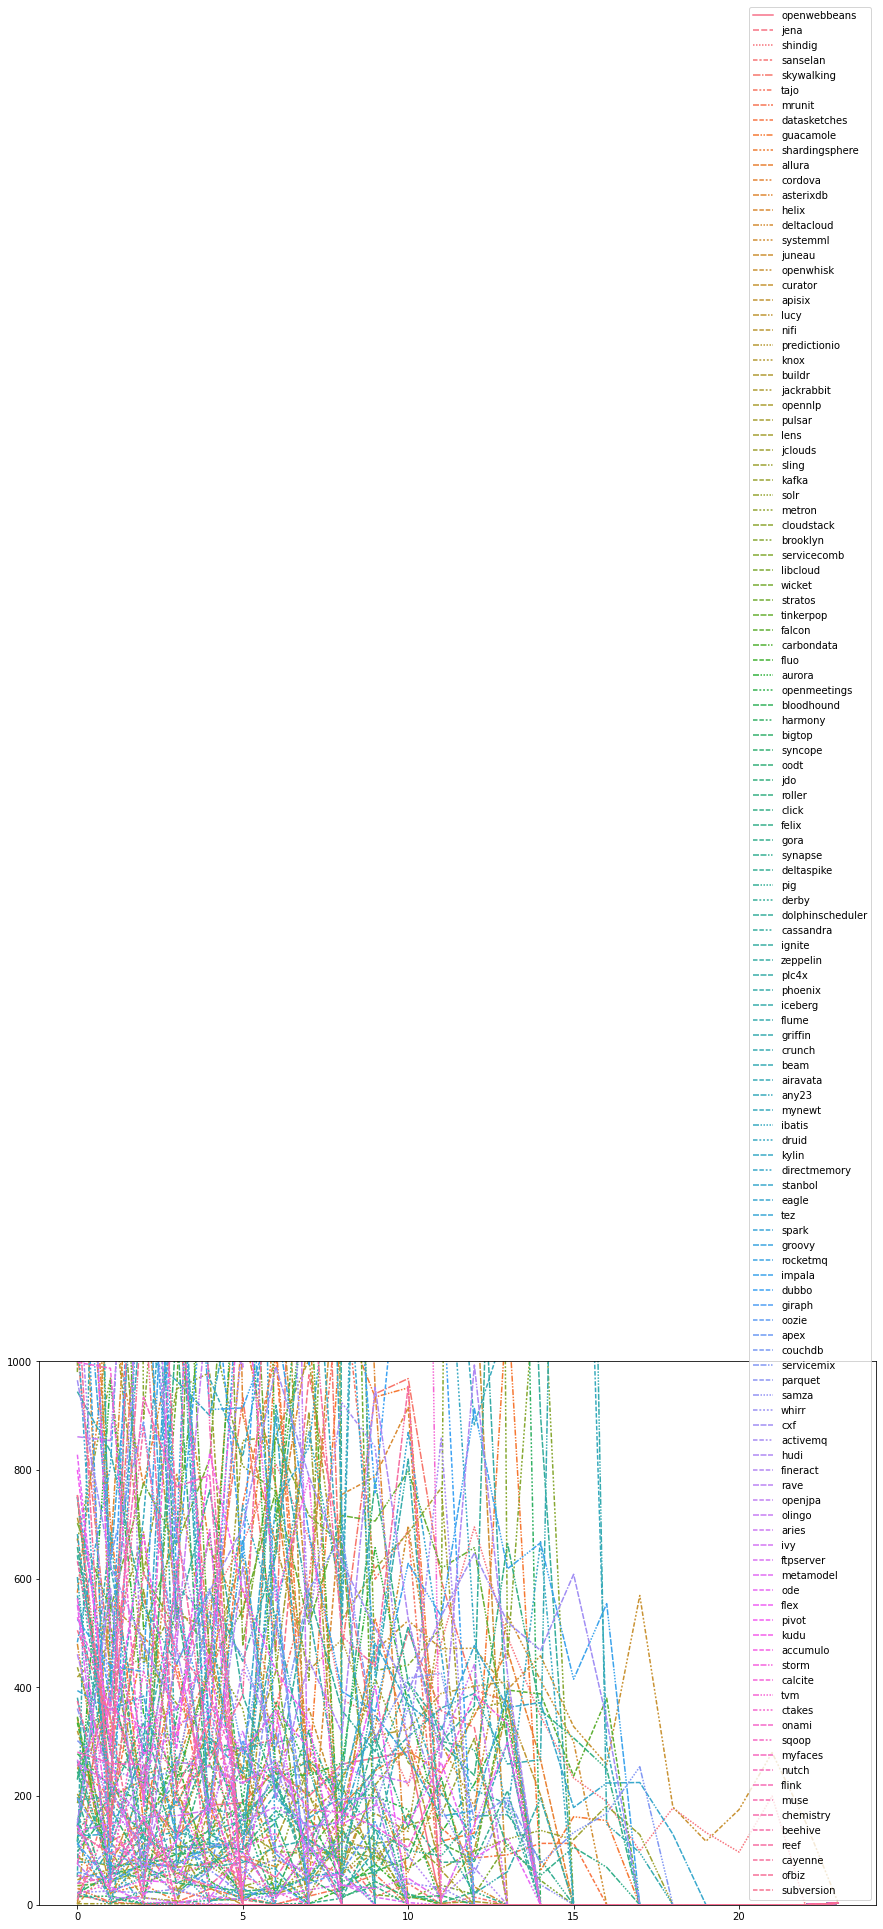

In [211]:
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(3.0).T)

In [212]:
this_group= df_temp_clusters.groupby(23).get_group(3.0)
len(this_group)

126

<AxesSubplot:>

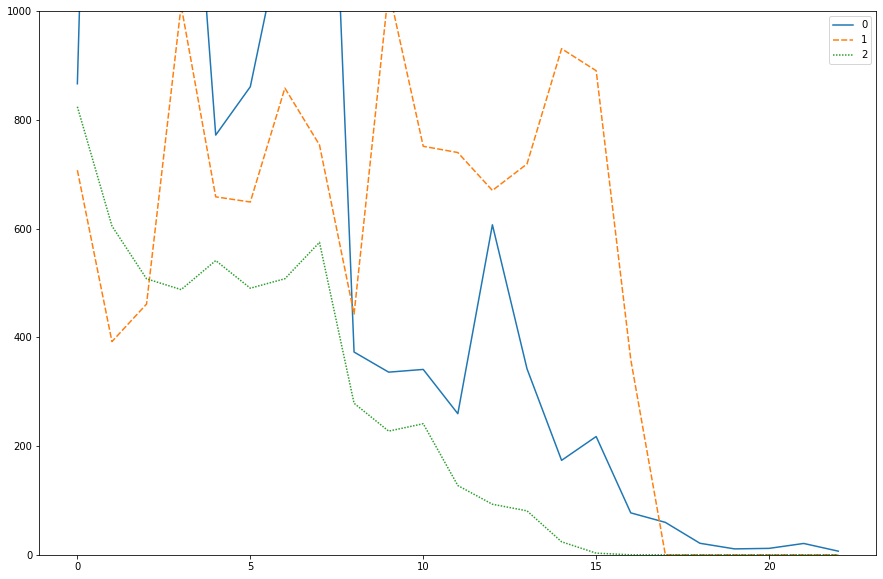

In [213]:
vectors_temp = this_group[range(23)].values
temp_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_temp)
df_labels_temp = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_labels_temp.values.T)

In [214]:
pd.value_counts(temp_clusterer.labels_)

 1    99
-1    23
 0     4
dtype: int64

## Outliers of the graduate group
+ Clustering second time for the outliers of graduate group

In [215]:
this_group= df_tech_edgesize_graduated_labeled.groupby(23).get_group(-1.0)
len(this_group)

11

<AxesSubplot:>

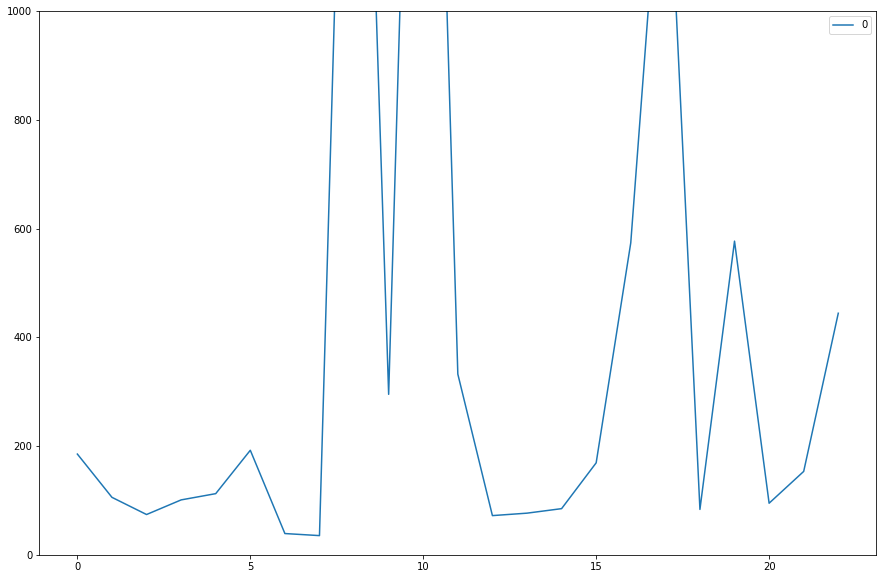

In [216]:
vectors_temp = this_group.drop(['outliers_mean'])[range(23)].values
temp_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_temp)
df_labels_temp = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_labels_temp.values.T)

In [217]:
pd.value_counts(temp_clusterer.labels_)

-1    10
dtype: int64

In [218]:
df_labels_temp

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
23,,,,,,,,,,,,,,,,,,,,,
-1.0,185.3,105.7,74.1,101.0,112.5,192.3,39.1,35.3,2259.0,295.2,...,76.6,84.9,169.2,573.8,1421.1,83.5,577.0,94.9,153.4,444.4


In [219]:
df_temp_clusters = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).T
df_temp_clusters.columns = this_group.T.columns[:len(this_group.T.columns)-1]
df_temp_clusters = df_temp_clusters.T

# Clustering of Retired Group

<AxesSubplot:>

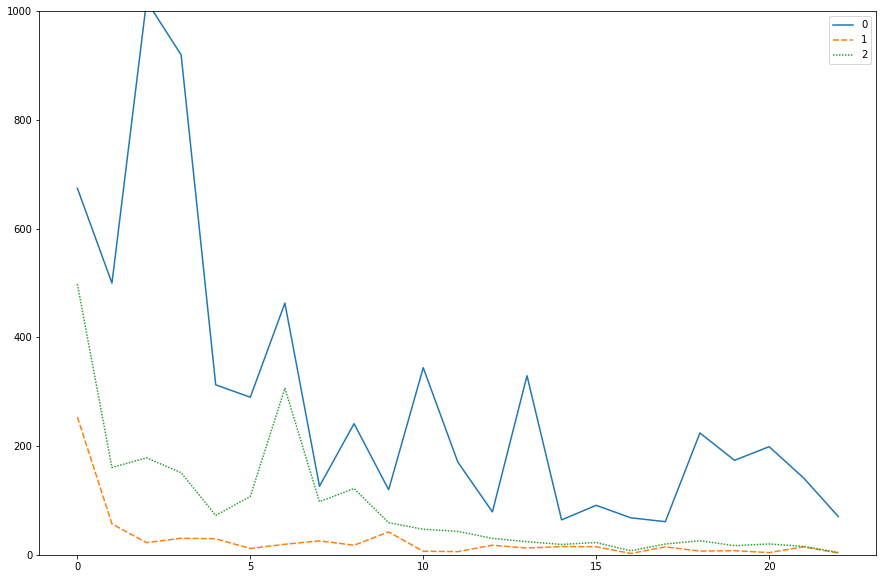

In [220]:
tech_retired_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 3).fit(vectors_tech_edgesize_retired)
df_labels_mean = pd.DataFrame(np.c_[vectors_tech_edgesize_retired, tech_retired_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_labels_mean.values.T)

In [221]:
pd.value_counts(tech_retired_clusterer.labels_)

 1    31
-1    14
 0     5
dtype: int64

<AxesSubplot:>

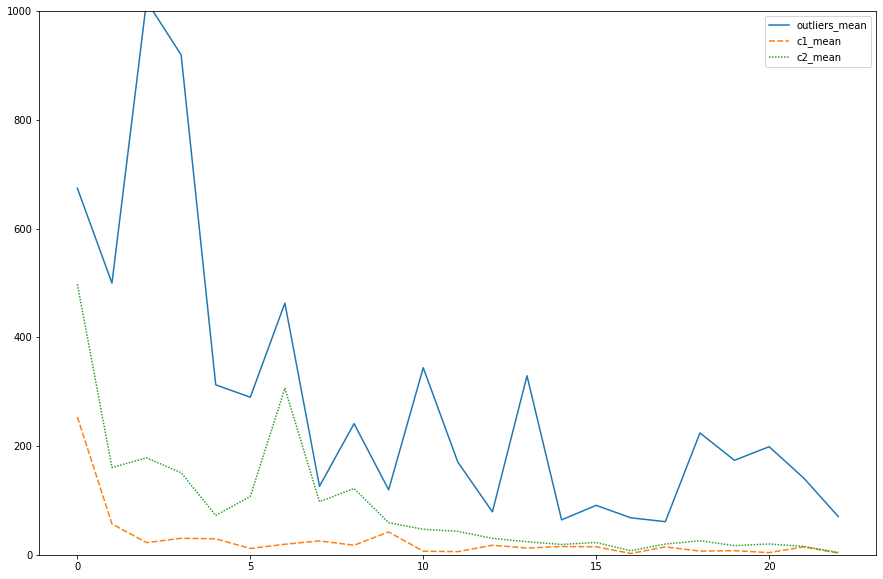

In [222]:
temp_labels_mean = df_labels_mean.T
temp_labels_mean.columns=['outliers_mean', 'c1_mean', 'c2_mean']
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= temp_labels_mean)

In [223]:
temp_labels_mean.loc[23]=[-1,0,1]

In [224]:
df_tech_edgesize_retired_labeled = pd.DataFrame(np.c_[vectors_tech_edgesize_retired, tech_retired_clusterer.labels_]).T
df_tech_edgesize_retired_labeled.columns = df_tech_edgesize_retired.T.columns
df_tech_edgesize_retired_labeled = pd.concat([df_tech_edgesize_retired_labeled.T, temp_labels_mean.T], axis=0)
#df_tech_edgesize_retired_labeled['time'] = df_tech_edgesize_retired_labeled.index
#df_tech_edgesize_retired_labeled

<AxesSubplot:>

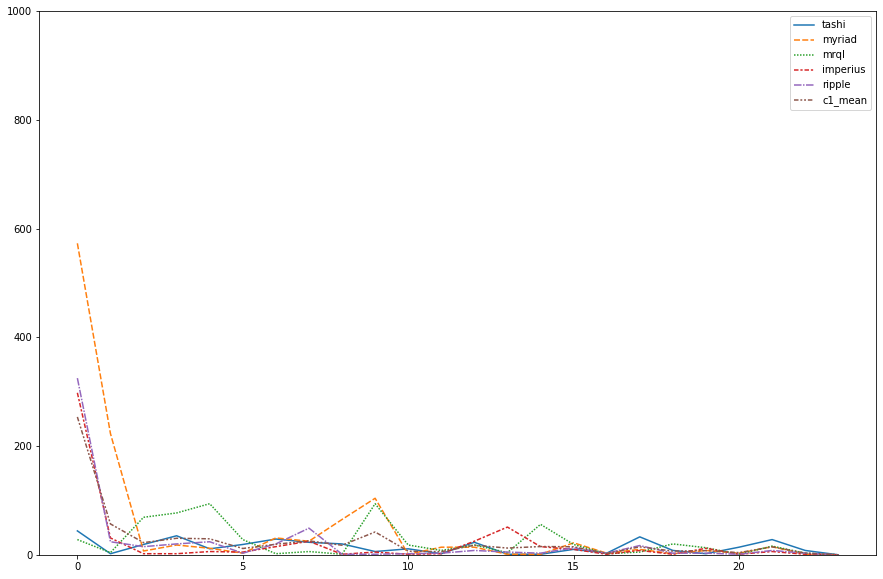

In [225]:
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_tech_edgesize_retired_labeled.groupby(23).get_group(0.0).T)


<AxesSubplot:>

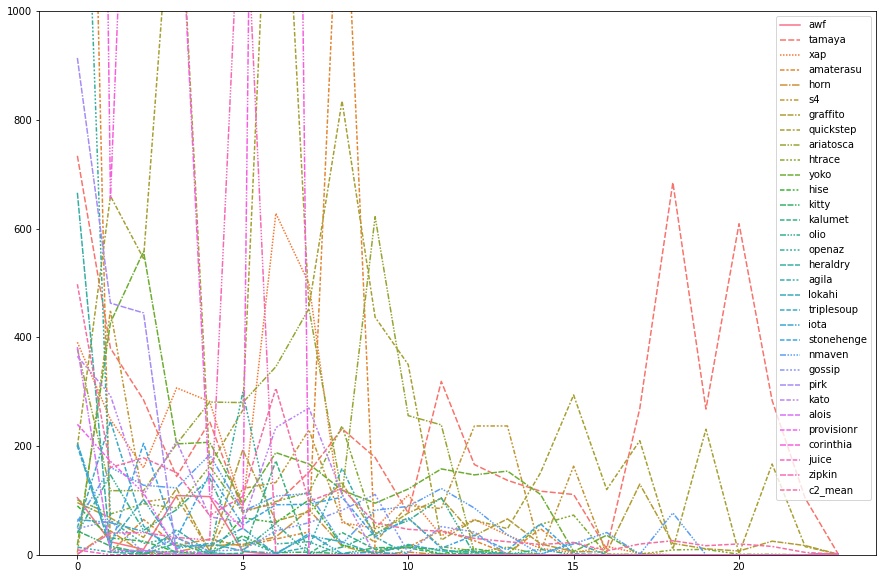

In [226]:
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_tech_edgesize_retired_labeled.groupby(23).get_group(1.0).T)


<AxesSubplot:>

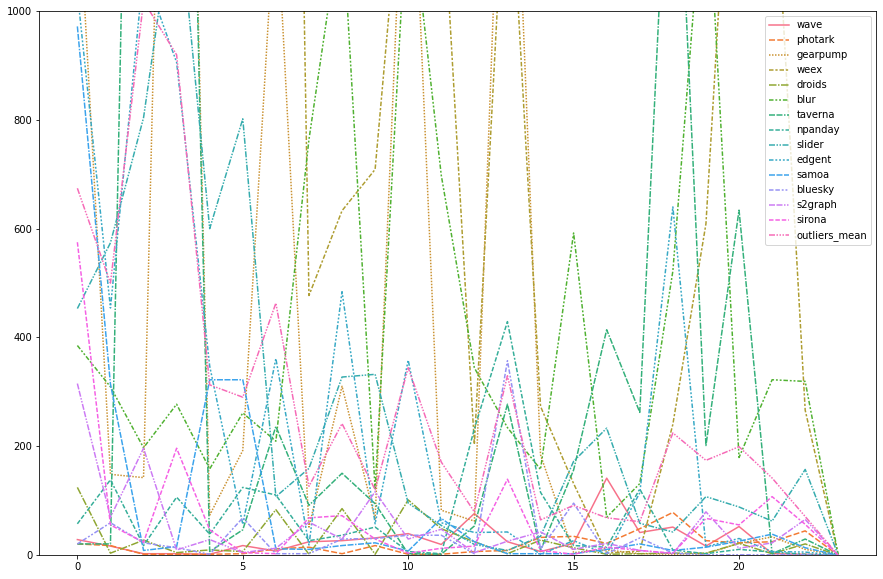

In [227]:
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_tech_edgesize_retired_labeled.groupby(23).get_group(-1.0).T)


### Third Level Clustering

In [228]:
this_group= df_tech_edgesize_retired_labeled.groupby(23).get_group(-1.0)
len(this_group)

15

<AxesSubplot:>

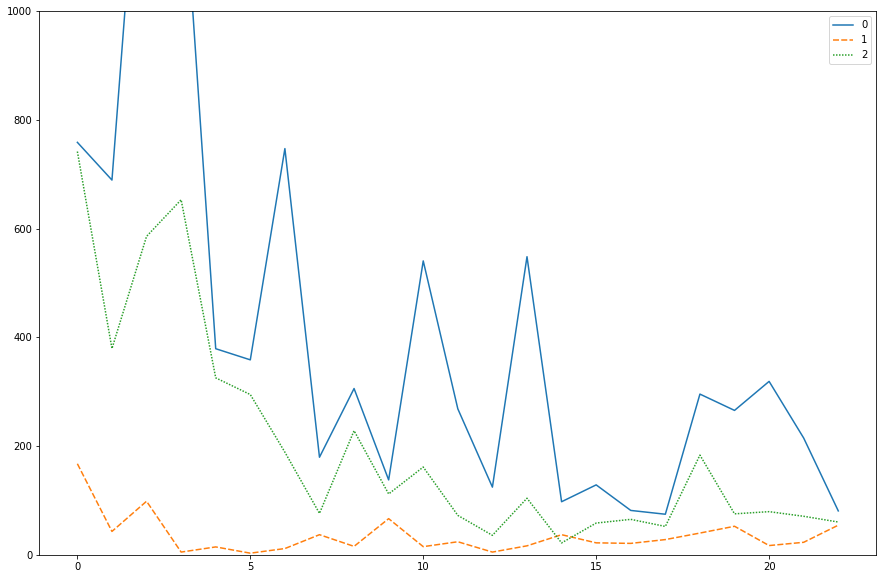

In [229]:
vectors_temp = this_group[range(23)].values
temp_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_temp)
df_labels_temp = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_labels_temp.values.T)

In [230]:
pd.value_counts(temp_clusterer.labels_)

-1    8
 1    5
 0    2
dtype: int64

In [231]:
pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).get_group(1.0)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
8,453.000000,574.000000,804.000000,1229.000000,600.000000,802.000000,107.0,159.000000,327.000000,332.000000,...,34.000000,172.0,233.000000,58.000000,42.000000,107.000000,88.000000,62.000000,157.000000,1.0
9,1035.000000,454.000000,1075.000000,906.000000,347.000000,56.000000,361.0,18.000000,484.000000,57.000000,...,1.000000,26.0,1.000000,114.000000,640.000000,15.000000,30.000000,6.000000,5.000000,1.0
10,972.000000,314.000000,8.000000,15.000000,322.000000,322.000000,11.0,10.000000,17.000000,22.000000,...,2.000000,2.0,10.000000,20.000000,8.000000,14.000000,25.000000,38.000000,13.000000,1.0
13,575.000000,55.000000,23.000000,196.000000,46.000000,4.000000,2.0,68.000000,72.000000,29.000000,...,8.000000,1.0,14.000000,8.000000,3.000000,67.000000,55.000000,107.000000,56.000000,1.0
14,674.285714,499.857143,1018.642857,919.714286,312.642857,289.928571,463.0,126.071429,241.285714,119.642857,...,64.285714,91.0,68.071429,60.928571,224.142857,173.785714,198.857143,141.214286,70.428571,1.0


## Outliers of the Graduated group
+ Clustering second time for the outliers of retired group

In [232]:
this_group= df_tech_edgesize_graduated_labeled.groupby(23).get_group(-1.0)
len(this_group)

11

<AxesSubplot:>

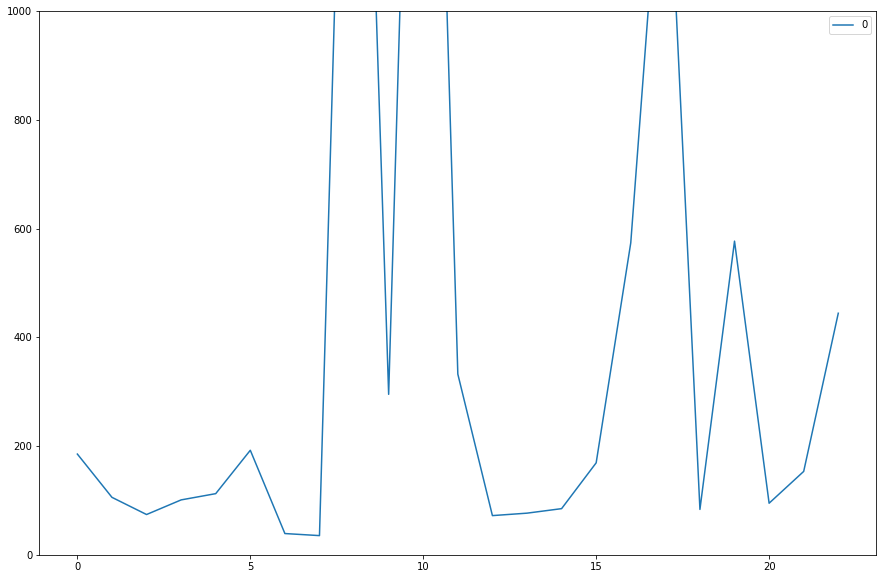

In [233]:
vectors_temp = this_group.drop(['outliers_mean'])[range(23)].values
temp_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_temp)
df_labels_temp = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,1000)
sns.lineplot(data= df_labels_temp.values.T)

In [234]:
pd.value_counts(temp_clusterer.labels_)

-1    10
dtype: int64